In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
X_train = pd.read_csv('~/x_train_keybert.csv')
X_train.head()

,title,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,Biography,...,Keyword_town,Keyword_travel,Keyword_village,Keyword_war,Keyword_wedding,Keyword_wife,Keyword_woman,Keyword_writer,Keyword_york,Keyword_young
0,Couple in a Hole,2015,NaN,0,105.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,You're Telling Me!,1934,NaN,0,66.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,The Giant Spider Invasion,1975,NaN,0,84.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,The Christmas Tango,2011,NaN,0,102.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,The All-American Boy,1973,NaN,0,118.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
X_train = X_train.drop(['title', 'end_year'], axis = 1)

In [4]:
y_train = pd.read_csv('~/y_train.csv')
y_train

,rating
0,5.4
1,7.6
2,3.2
3,7.1
4,5.3
...,...
58176,5.2
58177,6.2
58178,7.2
58179,5.7


In [5]:
# Features selected from feature selection step
features = pd.read_csv('~/feature_scores_keybert.csv').transpose()

In [6]:
sel_features = features.reset_index().head(100)

In [7]:
sel_features_lst = sel_features['index'].tolist()

In [8]:
sel_features_lst

['Horror',
 'type',
 'Drama',
 'Thriller',
 'Sci-Fi',
 'Animation',
 'Documentary',
 'History',
 'release_year',
 'Biography',
 'Keyword_series',
 'Keyword_story',
 'Keyword_killer',
 'Action',
 'Keyword_sex',
 'Keyword_group',
 'Keyword_life',
 'Romance',
 'Keyword_horror',
 'Keyword_scientist',
 'Keyword_party',
 'Keyword_kill',
 'Crime',
 'Cast_ericroberts',
 'Keyword_kidnap',
 'Keyword_drama',
 'Keyword_college',
 'Keyword_house',
 'War',
 'Keyword_haunt',
 'Keyword_alien',
 'Keyword_village',
 'Keyword_woman',
 'Short',
 'Music',
 'runtime',
 'Cast_michaelparã©',
 'Cast_kamalhaasan',
 'Cast_dolphlundgren',
 'Keyword_revenge',
 'Keyword_ghost',
 'Keyword_war',
 'Keyword_love',
 'Film-Noir',
 'Cast_deancain',
 'Keyword_island',
 'Keyword_drug',
 'Cast_caspervandien',
 'Keyword_boy',
 'Keyword_family',
 'Keyword_escape',
 'Keyword_murder',
 'Cast_tomsizemore',
 'Cast_lancehenriksen',
 'Cast_kevinsorbo',
 'Cast_tonytodd',
 'Cast_mohanlal',
 'Keyword_live',
 'Keyword_crime',
 'Cast_jef

In [9]:
# Keep only relevant features from feature selection step
X_train = X_train[sel_features_lst]

In [10]:
X_train

,Horror,type,Drama,Thriller,Sci-Fi,Animation,Documentary,History,release_year,Biography,...,Cast_briankrause,Keyword_journey,Cast_billyzane,Cast_cynthiarothrock,Keyword_character,Cast_vernonwells,Cast_stevenseagal,Keyword_child,Cast_michaelironside,Keyword_death
0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,2015,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,1
1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1934,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
2,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1975,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
3,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,2011,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1973,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58176,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,2015,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,1
58177,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,2004,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
58178,0.0,1,1.0,1.0,0.0,0.0,0.0,0.0,2021,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
58179,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1959,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0


## Build model with default parameters

In [11]:
import lightgbm as lgb
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

/Users/JX/opt/anaconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
#lightGBM model fit
gbm = lgb.LGBMRegressor(random_state = 1)
#MSE (5-fold cross validation)
cv = KFold(n_splits=5, shuffle=True, random_state=10)
score_default = -cross_val_score(gbm, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error')
score_default.mean()

1.1177819842331262

In [13]:
gbm.fit(X_train, y_train)

# MSE (In-sample)
pred_y = gbm.predict(X_train)
mse = mean_squared_error(y_train, pred_y)
mse

1.0642103975416024

In [14]:
gbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 1,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

## Hyperparameter Tuning

In [23]:
# LightGBM parameters
parameters = {
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],
    'num_iterations': [80, 100, 120, 150, 250, 400, 600],
    
    'max_depth': [-1, 5, 10, 15, 20, 25, 30],
    'num_leaves': [10, 30, 31, 50, 80, 100, 200, 400],
    
    'min_child_samples' : [5, 8, 10, 15, 18, 20, 25, 30],
    'colsample_bytree': [0.75, 0.8, 0.9, 1], #feature fraction
    'reg_alpha': [0, 0.03, 0.07, 0.1, 0.4, 0.8],
    'reg_lambda': [0, 0.03, 0.07, 0.1, 0.4, 0.8]
    }

In [24]:
from sklearn.model_selection import RandomizedSearchCV

model = lgb.LGBMRegressor(random_state = 1)
cv = KFold(n_splits=5, shuffle=True, random_state=10)
lgbm =RandomizedSearchCV(model,parameters,cv = cv, scoring='neg_mean_squared_error',n_iter=150,random_state = 1, n_jobs = -1)


In [25]:
lgbm.fit(X_train, y_train)


/Users/JX/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=LGBMRegressor(random_state=1), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.75, 0.8, 0.9, 1],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25],
                                        'max_depth': [-1, 5, 10, 15, 20, 25,
                                                      30],
                                        'min_child_samples': [5, 8, 10, 15, 18,
                                                              20, 25, 30],
                                        'num_iterations': [80, 100, 120, 150,
                                                           250, 400, 600],
                                        'num_leaves': [10, 30, 31, 50, 80, 100,
                                                       200, 400],
          

In [26]:
lgbm.best_params_

{'reg_lambda': 0.8,
 'reg_alpha': 0.07,
 'num_leaves': 100,
 'num_iterations': 120,
 'min_child_samples': 18,
 'max_depth': 20,
 'learning_rate': 0.05,
 'colsample_bytree': 0.75}

In [27]:
lgbm.best_score_

-1.1064073869117141

### Hyperparameter tuning II
From the results of the first hyperparameter tuning, we do a more fine-grained tuning with values of search limited to around the vicinity of the optimal values. 

In [28]:
# LightGBM parameters
parameters2 = {
    'learning_rate': [0.005, 0.01, 0.03, 0.05, 0.08, 0.1],
    'num_iterations': [100, 120, 200, 250, 300, 400, 600],
    
    'max_depth': [18, 20, 22, 24, 28],
    'num_leaves': [90, 95, 100, 120, 150, 180, 200, 300],
    
    'min_child_samples' : [14, 16, 18, 20, 22],
    'colsample_bytree': [0.7, 0.73, 0.75, 0.8, 0.84], #feature fraction
    'reg_alpha': [0.03, 0.05, 0.07, 0.09, 0.12],
    'reg_lambda': [0.7, 0.75, 0.8, 0.85, 0.9, 1, 1.1]
    }

In [29]:
from sklearn.model_selection import RandomizedSearchCV

model2 = lgb.LGBMRegressor(random_state = 1)
cv2 = KFold(n_splits=5, shuffle=True, random_state=10)
lgbm2 =RandomizedSearchCV(model2,parameters2,cv = cv2, scoring='neg_mean_squared_error',n_iter=150,random_state = 1, n_jobs = -1)


In [30]:
lgbm2.fit(X_train, y_train)


/Users/JX/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
                   estimator=LGBMRegressor(random_state=1), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.73, 0.75,
                                                             0.8, 0.84],
                                        'learning_rate': [0.005, 0.01, 0.03,
                                                          0.05, 0.08, 0.1],
                                        'max_depth': [18, 20, 22, 24, 28],
                                        'min_child_samples': [14, 16, 18, 20,
                                                              22],
                                        'num_iterations': [100, 120, 200, 250,
                                                           300, 400, 600],
                                        'num_leaves': [90, 95, 100, 120, 150,
                                                       180, 200, 300],

In [31]:
lgbm2.best_params_

{'reg_lambda': 1.1,
 'reg_alpha': 0.03,
 'num_leaves': 120,
 'num_iterations': 300,
 'min_child_samples': 14,
 'max_depth': 18,
 'learning_rate': 0.03,
 'colsample_bytree': 0.73}

In [32]:
lgbm2.best_score_

-1.1027587195929307

## Build Final Model

In [15]:
#besr_params obtained from lgbm2
best_params = {'reg_lambda': 1.1,
 'reg_alpha': 0.03,
 'num_leaves': 120,
 'num_iterations': 300,
 'min_child_samples': 14,
 'max_depth': 18,
 'learning_rate': 0.03,
 'colsample_bytree': 0.73}

In [16]:
#lightGBM model fit
final_model = lgb.LGBMRegressor(random_state = 1, **best_params)
final_model.fit(X_train, y_train)

/Users/JX/opt/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBMRegressor(colsample_bytree=0.73, learning_rate=0.03, max_depth=18,
              min_child_samples=14, num_iterations=300, num_leaves=120,
              random_state=1, reg_alpha=0.03, reg_lambda=1.1)

In [17]:
# MSE (In-sample)
pred_y_train = final_model.predict(X_train)
mse_train = mean_squared_error(y_train, pred_y_train)
mse_train

0.9802401646087445

## Test Data

In [18]:
X_test = pd.read_csv('~/X_test_keybert.csv')
X_test.head()

,title,release_year,end_year,type,runtime,Action,Adult,Adventure,Animation,Biography,...,Keyword_town,Keyword_travel,Keyword_village,Keyword_war,Keyword_wedding,Keyword_wife,Keyword_woman,Keyword_writer,Keyword_york,Keyword_young
0,The Lost Tree,2016,NaN,0,88.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Another Day of Life,2018,NaN,0,85.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,0
2,Two Years Before the Mast,1946,NaN,0,98.0,1.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,The Resurrection of Gavin Stone,2017,NaN,0,91.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Tales from the Golden Age,2009,NaN,0,155.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X_test = X_test.drop(['title', 'end_year'], axis = 1)

In [20]:
y_test = pd.read_csv('~/y_test.csv')
y_test

,rating
0,4.9
1,7.2
2,6.9
3,6.3
4,7.8
...,...
14541,7.2
14542,7.3
14543,5.9
14544,5.3


In [21]:
# Keep only relevant columns from feature selection step
X_test = X_test[sel_features_lst]

In [22]:
X_test

,Horror,type,Drama,Thriller,Sci-Fi,Animation,Documentary,History,release_year,Biography,...,Cast_briankrause,Keyword_journey,Cast_billyzane,Cast_cynthiarothrock,Keyword_character,Cast_vernonwells,Cast_stevenseagal,Keyword_child,Cast_michaelironside,Keyword_death
0,1.0,0,1.0,1.0,0.0,0.0,0.0,0.0,2016,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
1,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,2018,1.0,...,0.0,1,0.0,0.0,0,0.0,0.0,0,0.0,0
2,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1946,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
3,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,2017,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,1,0.0,0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,1.0,2009,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14541,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1969,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
14542,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,2003,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
14543,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1998,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
14544,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1975,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0


In [23]:
# Results on test set
pred_y_test = final_model.predict(X_test)
mse_test = mean_squared_error(y_test, pred_y_test)
mse_test

1.1114899747368838

In [24]:
rmse_test = mean_squared_error(y_test, pred_y_test, squared=False)
rmse_test


1.0542722488697518

In [25]:
mae_test = mean_absolute_error(y_test, pred_y_test)
mae_test

0.8018421670710373

In [26]:
mape_test = mean_absolute_percentage_error(y_test, pred_y_test)
mape_test

0.15421803312433557

In [27]:
1 - mape_test

0.8457819668756644

## Feature Importance

In [63]:
final_model.booster_.feature_importance()

# importance of each attribute
fea_imp_ = pd.DataFrame({'cols':X_train.columns, 'fea_imp':final_model.feature_importances_}).sort_values(by=['fea_imp'], ascending = False)
fea_imp_


,cols,fea_imp
35,runtime,8998
8,release_year,7640
13,Action,818
1,type,774
2,Drama,752
...,...,...
70,Cast_dannytrejo,29
98,Cast_michaelironside,26
55,Cast_tonytodd,23
69,Cast_billmoseley,23


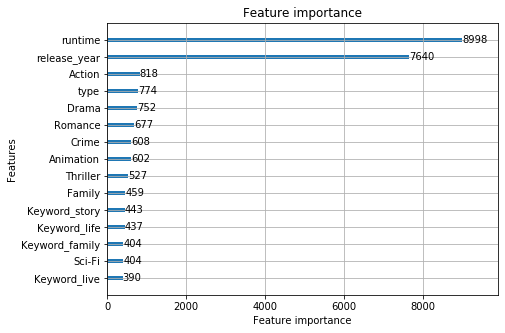

In [65]:
# Bar plot of top 15 feature importance (importance_type = split)
lgb.plot_importance(final_model, max_num_features =15, figsize = (7,5))


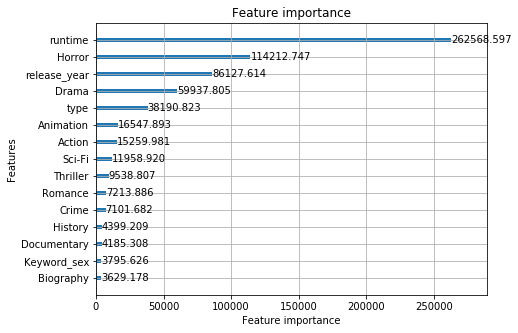

In [19]:
lgb.plot_importance(final_model, max_num_features =15, figsize = (7,5), importance_type = 'gain')


## Shap

In [28]:
import shap
import matplotlib.pyplot as plt


In [29]:
shap_values_test = shap.TreeExplainer(final_model).shap_values(X_test)

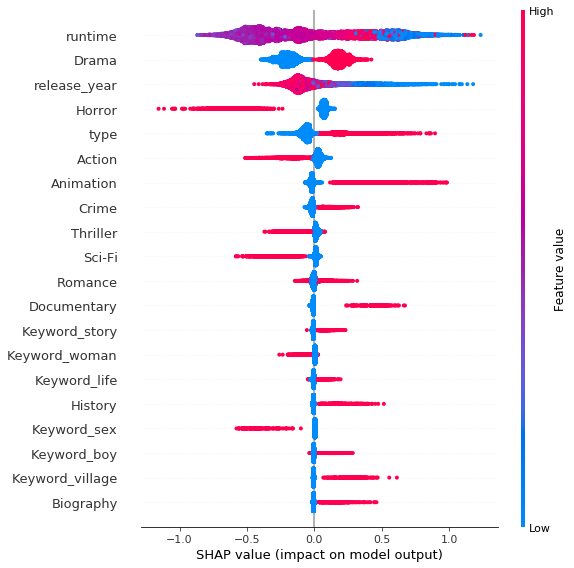

In [31]:
shap.summary_plot(shap_values_test, X_test)